<a href="https://colab.research.google.com/github/vitoriatorii/treinamento_turma3/blob/vitoriatorii/Redes_Convolucionais_para_Vis%C3%A3o_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from __future__ import print_function
import os, warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import Flatten, Activation, Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Input, MaxPooling2D, Flatten, Activation, Conv2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras.models import Model
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
import cv2
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
tf.keras.datasets

<module 'keras.api._v2.keras.datasets' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/__init__.py'>

In [17]:
from tensorflow.keras.utils import to_categorical
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    for X in [trainX, testX]:
        X = X/255
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [18]:
trainX, trainY, testX, testY = load_dataset()
trainX.shape

(50000, 32, 32, 3)

In [19]:
trainY.shape

(50000, 10)

In [20]:
testX.shape

(10000, 32, 32, 3)

In [21]:
testY.shape

(10000, 10)

In [22]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

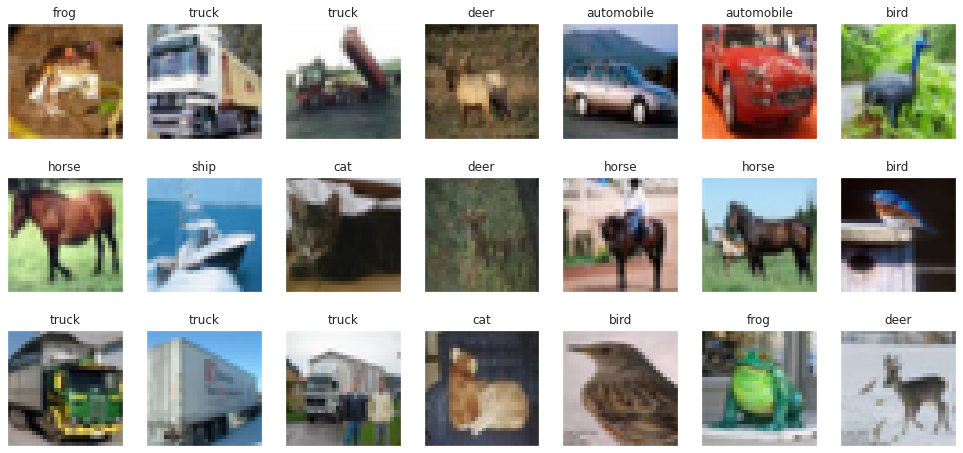

In [23]:
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()
def names(Xtrain,ytrain):
    fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
    index = 0
    for i in range(3):
        for j in range(7):
            axes[i,j].set_title(labels[ytrain[index][0]])
            axes[i,j].imshow(Xtrain[index])
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            index += 1
    return plt.show()
names(Xtrain,ytrain)

In [24]:
from keras.layers import Flatten, Activation, Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Input, MaxPooling2D, Flatten, Activation, Conv2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
def bloco(input_layer, filter, kernel_size, activation='relu', padding='same', drop_out=True, normalization=True, drop_out_radio=0.3):
    x = Conv2D(filter, kernel_size, padding = padding, activation=activation)(input_layer)
    max_pooling = MaxPooling2D((2,2),padding=padding)(x)
    if drop_out:
       x = Dropout(drop_out_radio)(max_pooling)
    if normalization:
       x = BatchNormalization()(x)
    return x

def ver(input_layer, neuron, dense_act='relu', out_act='softmax', num=10):
  y = Flatten()(input_layer)
  z = Dense(neuron, activation=dense_act)(y)
  w = Dense(num, activation=out_act)(z)
  return w

In [25]:
# Exercícios 11.2 - Nº 02a
img = Input(shape=(32,32,3))

newbloco = bloco(img, 32, 3)
new1bloco = bloco(newbloco, 64, 3)
new2bloco = bloco(new1bloco, 128, 3)

out = ver(new2bloco, 128)

model = Model(inputs=img, outputs=out)
early = EarlyStopping(patience=10,restore_best_weights=True)
model.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        1849

In [26]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss',factor=0.1, verbose=1, patience=5)
historyy = model.fit(trainX, trainY, epochs=50, batch_size=128, validation_data=(testX, testY), callbacks=[lr_reduce])

Epoch 1/2
391/391 [==============================] - 4s 9ms/step - loss: 0.2474 - accuracy: 0.4400 - val_loss: 0.1979 - val_accuracy: 0.5535 - lr: 0.0010
Epoch 2/2
391/391 [==============================] - 3s 8ms/step - loss: 0.1911 - accuracy: 0.5797 - val_loss: 0.2459 - val_accuracy: 0.4848 - lr: 0.0010


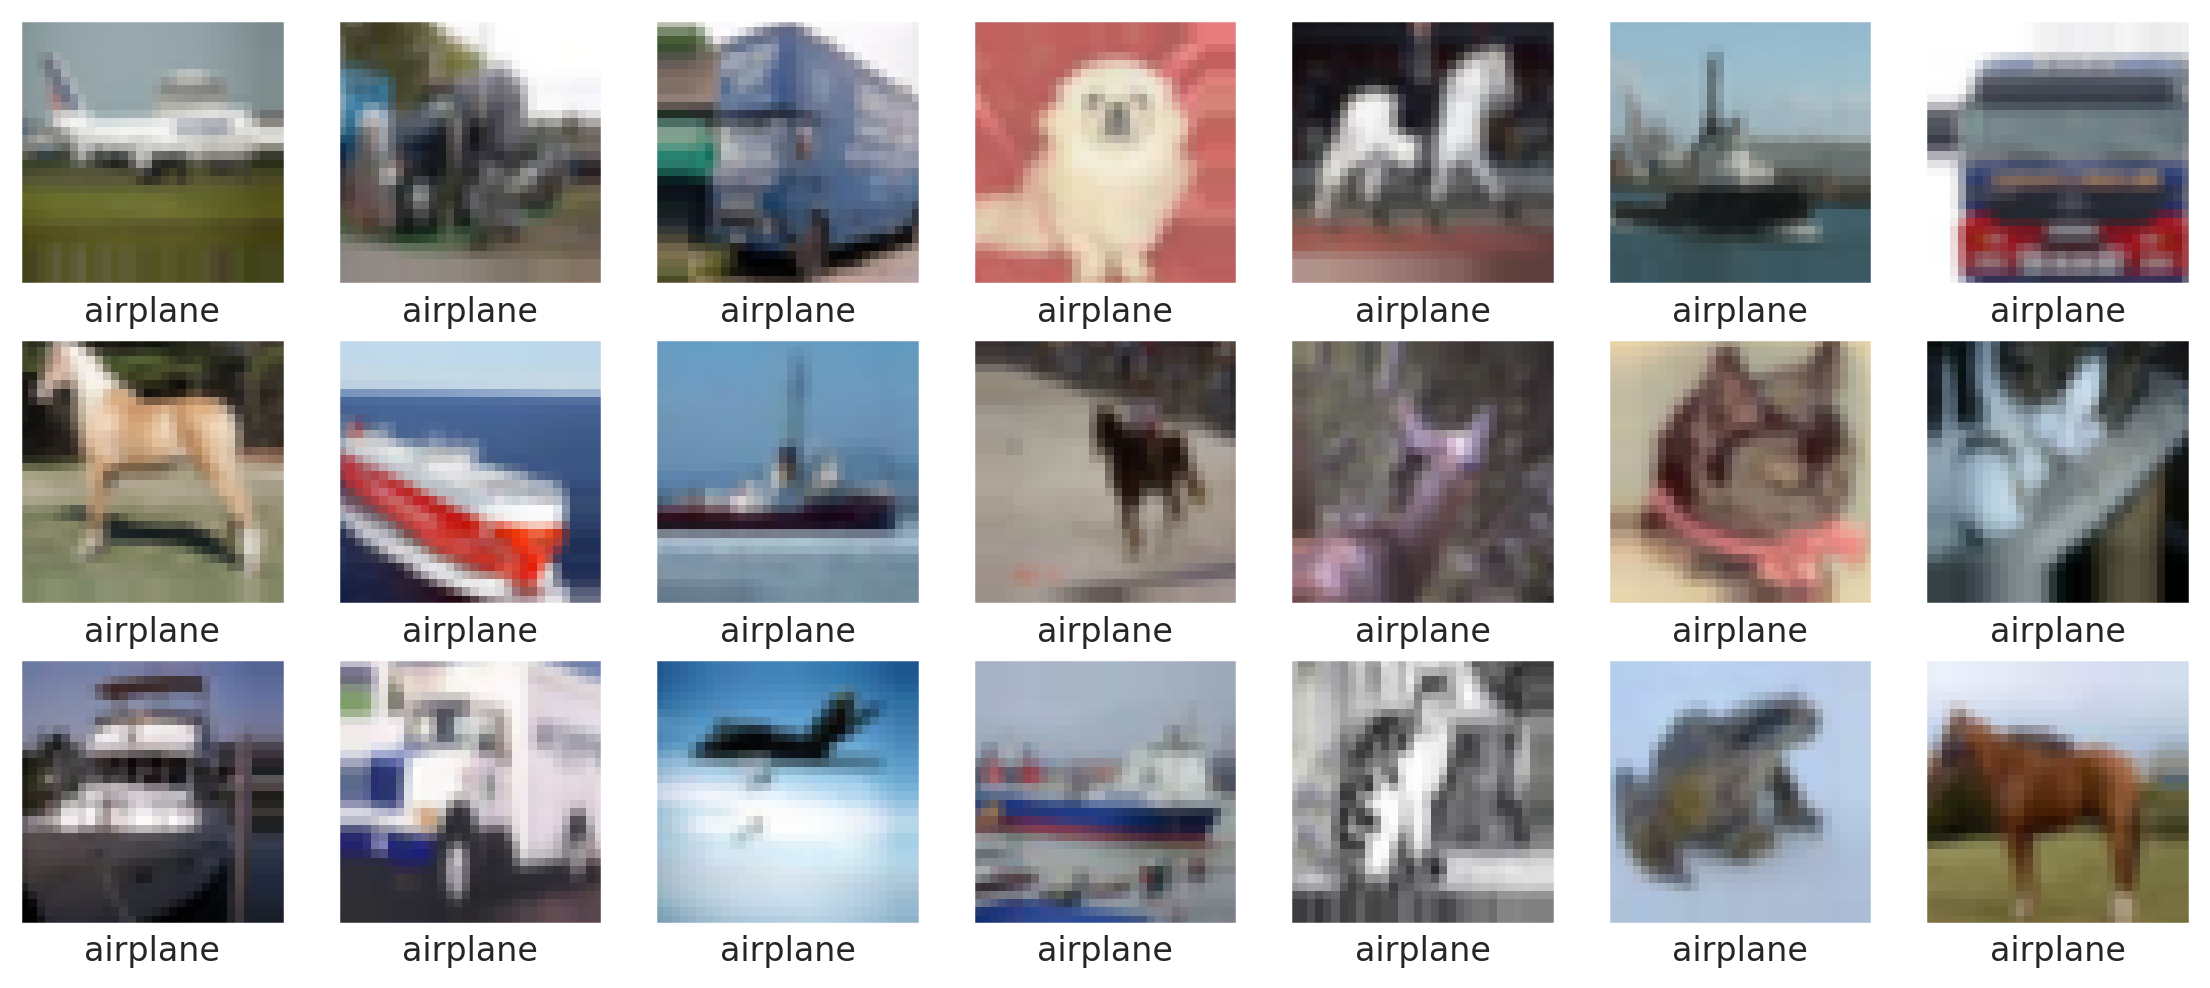

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
def imag(X,y):
  plt.figure(figsize=(14,6),dpi=200)
  for img in range(21):
      plt.subplot(3,7,img+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(X[img,:,:,:])
      plt.xlabel(labels[np.unravel_index(y[img].argmax(),shape=len(y[img]))[0]])
  plt.show()
gen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                            width_shift_range=4.0/32.0, height_shift_range=4.0/32.0)
gen.fit(Xtrain)

genn = gen.flow(Xtrain,ytrain,batch_size=128)

genX, geny = next(genn)

imag(genX,geny)

In [28]:
image = Input(shape=(32,32,3))

bloc = bloco(image, 32, 3)
blocc = bloco(bloc, 64, 3)
bloccc = bloco(blocc, 128, 3)

out2 = ver(bloccc, 128)
newmodel = Model(inputs=image, outputs=out2)
earl = EarlyStopping(patience=10,restore_best_weights=True)
newmodel.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

newmodel.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        1849

In [29]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
#noAug = model.fit(x_train, yTrainCod, batch_size=128, epochs=50, callbacks=early, validation_data=(x_test, yTestCod))
history = model.fit(genn, steps_per_epoch=trainX.shape[0]//128, epochs=50, batch_size=128, validation_data=(testX, testY), callbacks=[lr_reduce])

Epoch 1/2
390/390 [==============================] - 24s 61ms/step - loss: -408971.2812 - accuracy: 0.0034 - val_loss: 163907.5469 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/2
390/390 [==============================] - 29s 75ms/step - loss: -2795835.5000 - accuracy: 0.0000e+00 - val_loss: 1145832.1250 - val_accuracy: 0.1000 - lr: 0.0010


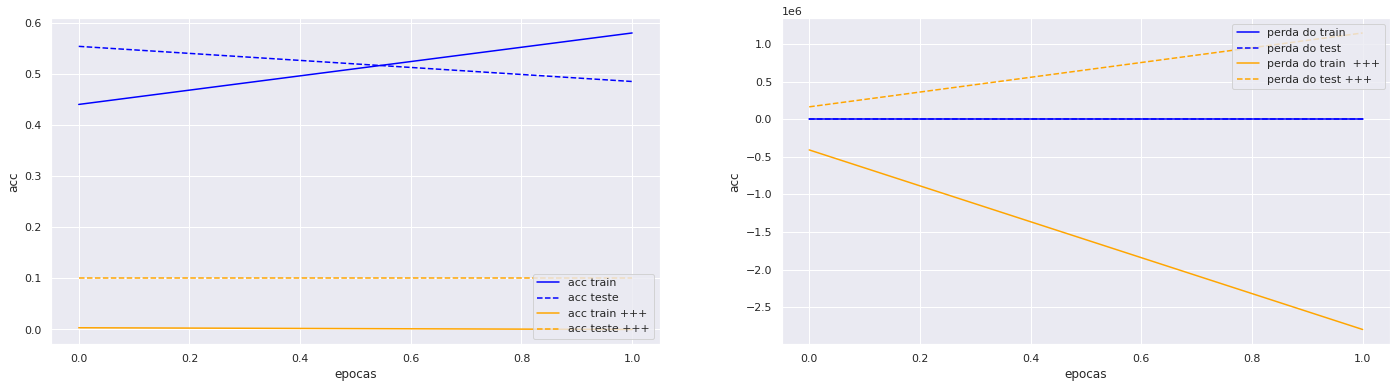

In [30]:
fig, (accuracy,los) = plt.subplots(1,2,figsize=(24,6));

accuracy.plot(historyy.history['accuracy'],
         label='acc train',
         c='blue', ls='-')
accuracy.plot(historyy.history['val_accuracy'],
         label='acc teste',
         c='blue', ls='--')
accuracy.plot(history.history['accuracy'],
         label='acc train +++',
         c='orange', ls='-')
accuracy.plot(history.history['val_accuracy'],
         label='acc teste +++',
         c='orange',ls='--')

accuracy.set_ylabel('acc')
accuracy.set_xlabel('epocas')
accuracy.legend(loc='lower right')

los.plot(historyy.history['loss'],
         label='perda do train',
         c='blue', ls='-')
los.plot(historyy.history['val_loss'],
         label='perda do test',
         c='blue',ls='--')
los.plot(history.history['loss'],
         label='perda do train  +++',
         c='orange', ls='-')
los.plot(history.history['val_loss'],
         label='perda do test +++',
         c='orange',ls='--')

los.set_xlabel('epocas')
los.set_ylabel('acc')
los.legend(loc='upper right')